In [14]:
import os
import sys

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install geomstats

You should consider upgrading via the '/home/taco650/ECE/ECE194N/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/taco650/ECE/ECE194N/bin/python -m pip install --upgrade pip' command.


In [15]:
import warnings
import numpy as np


sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
# from geomstats.geometry.spd_matrices import SPDMatrices
import geomstats.visualization as viz
from symmetric_positive_definite import *
import matplotlib
import math

# Introduction



Symmetric Positive Definite (SPD) matrices are often encountered and have had great success in a variety of areas such as medical imaging, visual recognition and data analysis. However, the computations on SPD matrices often accompany with the challenge of their non-Euclidean data structure that underlies a Riemannian manifold. Several Riemannian metrics have been introduced in order to encode the Riemannian geometry of SPD manifolds properly.

A symmetric matrix is a square matrix that is equal to its transpose,

i.e. $A$ is symmetric $\Leftrightarrow A^T = A$

An $n \times n $ symmetric real matrix $A$ is $\textbf{positive definite}$ if $x^TAx > 0$ for all non-zero $x \in \Re^n$
## Useful Properties
Some useful properties of SPD matrices include the following:


1. All the eigenvalues of a SPD Matrix are striclty positive

2. All the subdeterminats of a SPD Matrix are positive

3. Every SPD Matrix has a unique Cholesky Decomposistion such as $A=LL^T$ where $L$ is a a real lower triangular matrix with positive diagonal entries.



## Mathematical definition of the manifold
As this kind of matrix is symmetric, its $𝑛(𝑛+1)/2$ upper diagonal terms are enough to represent it. Hence, we can consider such a matrix as a point in $\Re^{\frac{n(n+1)}{2}}$.
Also we know that a conical combination of two positive definite matrices is also positive definite. Hence, the set of all symmetric positive definite matrices forms an open convex cone $\mathcal{P} \in \Re^{\frac{n(n+1)}{2}}$ with apex on the origin.

The set of all symmetric positive semidefinite matrices of particular dimension M is called
the $\textit{positive semidefinite cone}$:


$\begin{aligned}\mathbb{S}^M_+ &\overset{\Delta}{=} \{ A \in \mathbb{S}^M \vert A \succeq 0\}
\\\\&= \{ A \in \mathbb{S}^M \vert y^TAy \geq 0 \text{  } \forall \text{  }\|y\|=1\}
\\\\&= \bigcap\limits_{\|y\|=1}\{ A \in \mathbb{S}^M \vert \langle y^Ty,A\rangle \geq0\}
\\\\&= \{A \in\mathbb{S}^M_+ \vert \text{ rank } A \leq M \}\end{aligned}$



The positive definite (full-rank) matrices comprise the cone $\textit{interior}$:


$\begin{aligned}\text{intr}\mathbb{S}^M_+ &\overset{\Delta}{=} \{ A \in \mathbb{S}^M \vert A \succ 0\}
\\\\&= \{ A \in \mathbb{S}^M \vert y^TAy > 0 \text{  }  \forall \text{  }\|y\|=1\}
\\\\&= \bigcap\limits_{\|y\|=1}\{ A \in \mathbb{S}^M \vert \langle y^Ty,A\rangle >0\}
\\\\&= \{A \in\mathbb{S}^M_+ \vert \text{ rank } A = M \}\end{aligned}$



A straightforward metric
is the Frobenius norm between SPD matrices which is an
extension of the Euclidean measure, but several undesirable
effects may occur since the Frobenius norm ignores the manifold geometrical structure, such as the swelling of diffusion
tensors.

The SPD manifold is a topological space
locally similar to Euclidean space and with globally defined differential structure, which makes it possible to
define the derivatives of the curves on the manifold

## Real World uses of SPD Manifold








1. $\textbf{Computational Neuroscience}$ $\newline$ 
The topological patterns of brain networks are closely related to the brain functional organizations and the connection breakdown between the relevant brain regions has an
intimate association with the progress of neurodegenerative diseases. Interactions among these brain regions are often characterized by the cross-correlation matrix of spontaneous fluctuations observed in fMRIs. Cross-correlation matrices, belong to the family of symmetric positive definite (SPD) matrices $[1,2,3]$.$\newline$

1. $\textbf{Image Set Clasification}$ $\newline$
In image set classification, images that belong to the same class are viewed as an image set. The most representative samples are extracted from the set in order for a proper model or probability distribution to be learned to represent the intrinsic property of this set. The basic principle of image set classification is that, the measure of similarity is based on comparison between the most similar parts of two sets. The manifold of SPD matrices has been successfully used for data representation in image set classification $[6]$.$\newline$

1. $\textbf{Action Recognition}$ $\newline$
The feature covariance matrices are have been widely exploited in terms of action recognition tasks. The family of all
covariance matrices of a given order coincides with the
family of all symmetric matrices of the same order which is closed under linear combinations. Therefore, a benchmark approach includes the transformation of the classification problem in the closed convex
cone of covariance matrices into an equivalent problem in the
vector space of symmetric matrices via the matrix logarithm $[4]$.$\newline$

1. $\textbf{Gesture Recognition}$ $\newline$
Covariance descriptors give us a good feature representation of the interior of an image region with the form of a normalised covariance matrix. As previously mentioned covariance matrices belong to the group of symmetric positive
definite matrices $[5]$.$\newline$ 

1. $\textbf{Medical Imaging}$ $\newline$
Diffusion tensor imaging is extensively used to obtain high-resolution
information of internal structures of certain tissues or organs. For each tissue voxel, there is a $3 \times 3$ SPD matrix to describe the shape of local diffusion. Such information has many clinical applications, for example, it can be used to discover pathological area surrounded by healthy tissues $[7,8]$.

## Vizualizing the SPD(2) Manifold

With the help of Matplotlib and Geomstats $[9]$, the SPD(2) manifold can be visualized:


A SPD(2) matrix may often be represented as: 

$\begin{bmatrix}
\alpha & \beta\\
\beta & \gamma
\end{bmatrix}$


### Scatter


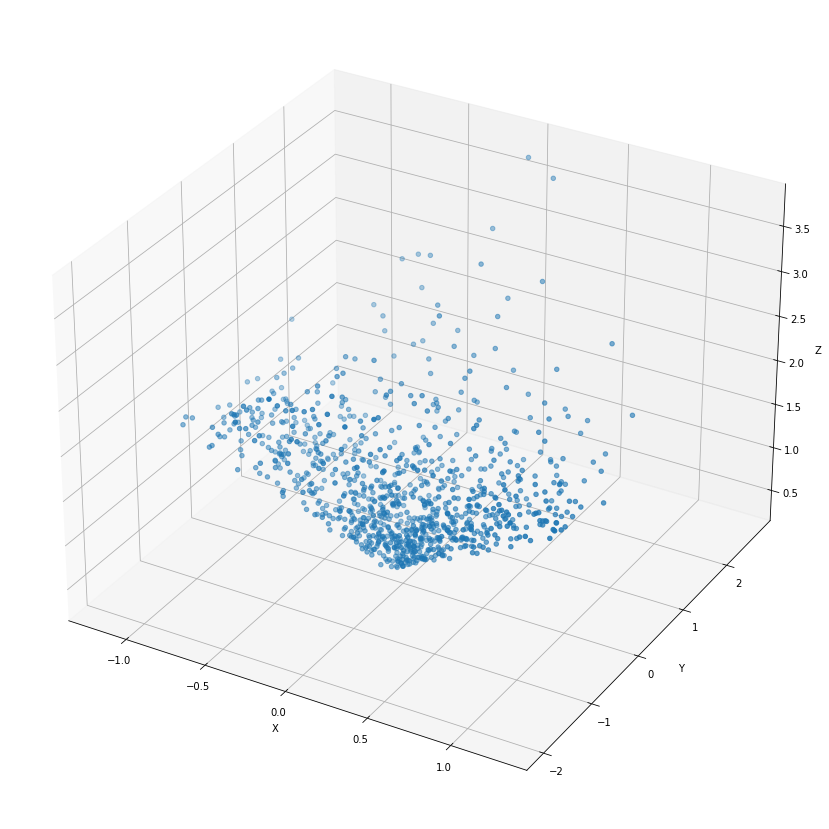

In [16]:
matplotlib.rcParams['figure.figsize'] = [15, 15]
viz = SymmetricPositiveDefiniteVizualization(1)

viz.scatter(n_samples=1000)
plt.show()


However, in order to easily graph the manifold they can also be represented as: 

$\begin{bmatrix}
z+x & y\\
y & z-x
\end{bmatrix}$

A SPD matrix must have a positive trace so:

$z+x+z-x>0$

$z>0$

Also, since all the eigenvalues of a SPD are positive, the determinant should be positive.

$(z+x)(z-x)-y^2>0$

$z^2>x^2+y^2$

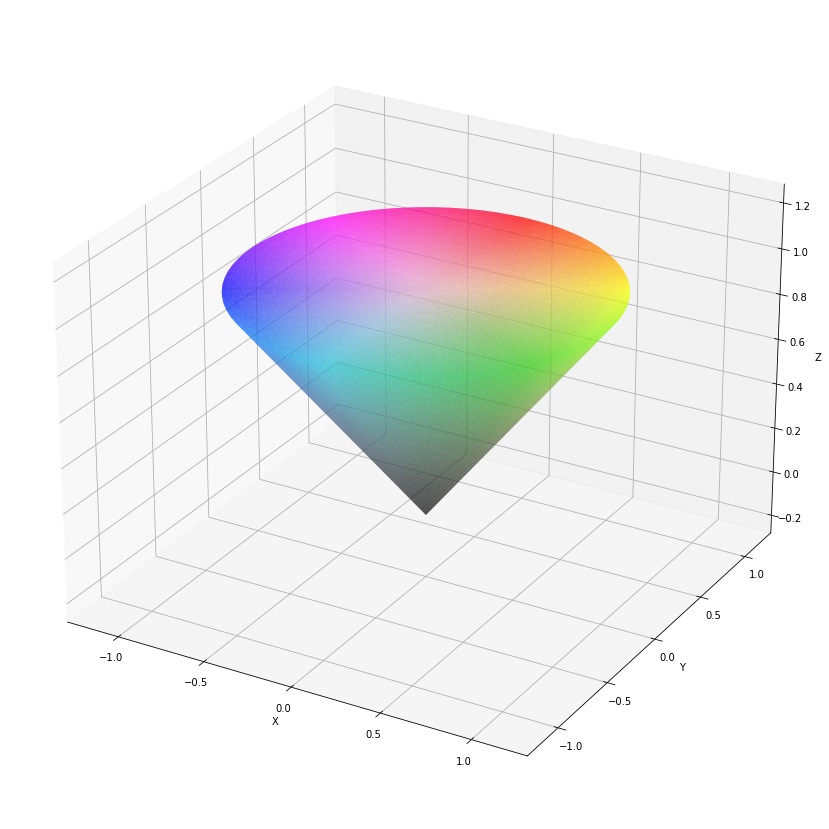

In [17]:
viz.plot(hsv=True)
plt.show(block=False)


### HSV 
The color is also related to the SPD matrix. The hue is related to the angle that the SPD is from the center pole. The saturation is related to the distance that the point is from the center pole. The value is related to the height of the point. 

## Visualizing Points on the Manifold

Since each SPD(2) matrix has 3 dof, they can be visualized as ellipses. One dof is the rotation, another is the scaling, and the last one is the aspect ratio between the major and minor lengths.



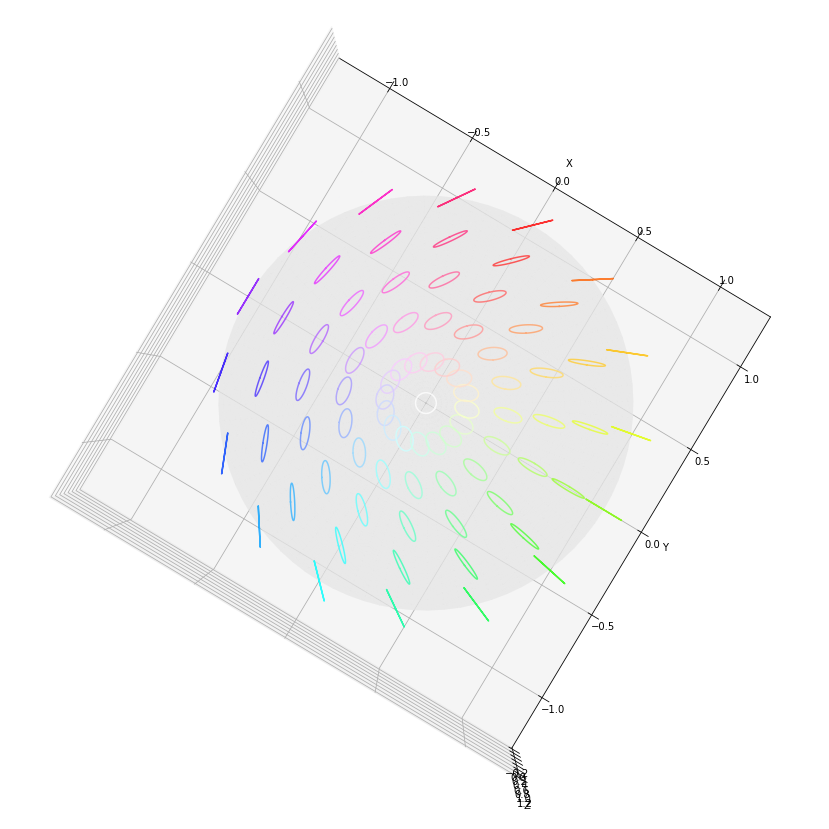

In [18]:
viz.plot(hsv=False)
viz.plot_rendering()
plt.show(block=False)

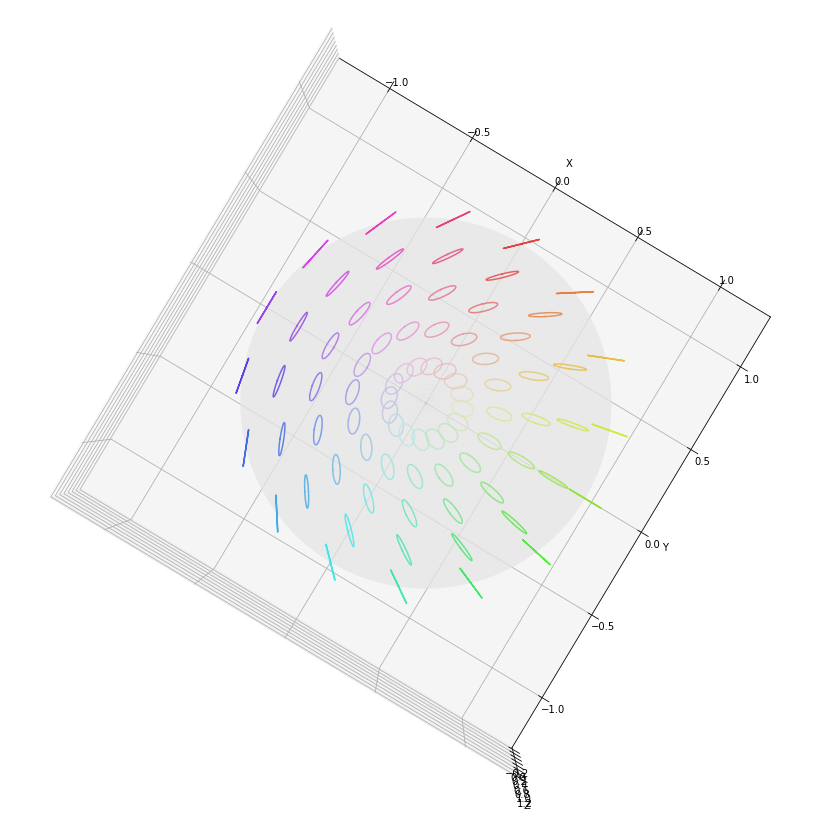

In [19]:
viz.plot(currZ=0.9, hsv=False)
viz.plot_rendering()
plt.show(block=False)

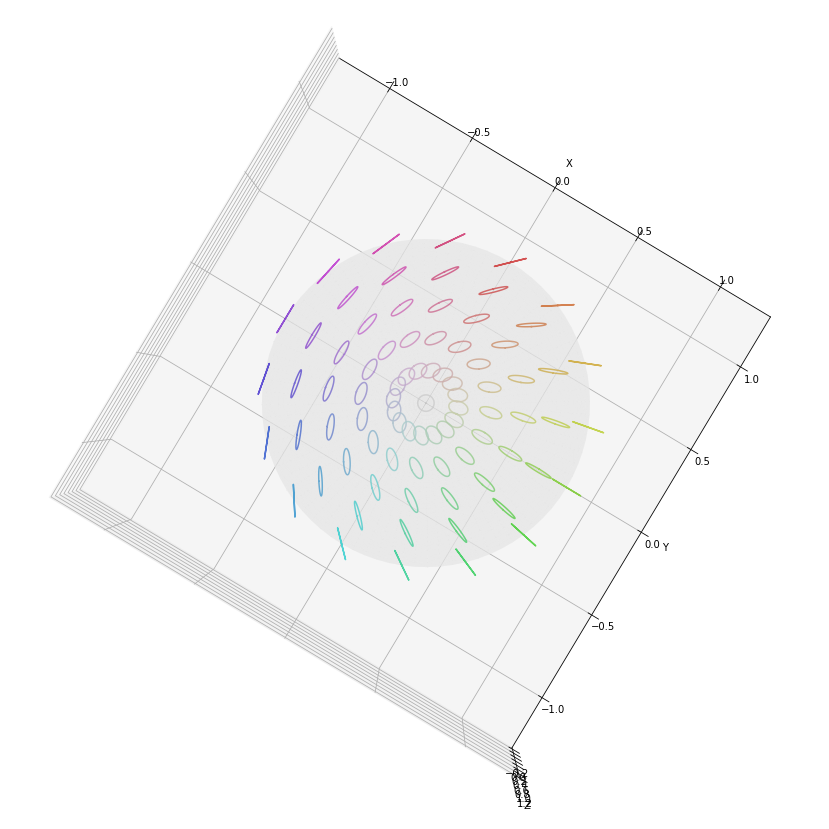

In [20]:
viz.plot(currZ=0.8, hsv=False)
viz.plot_rendering()
plt.show(block=False)

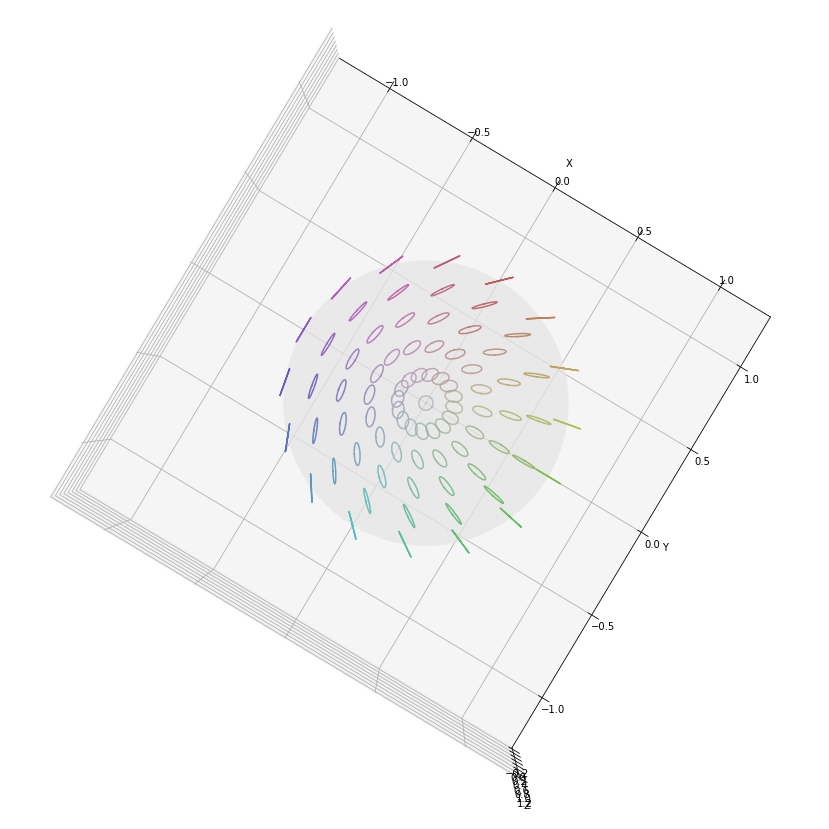

In [21]:
viz.plot(currZ=0.7, hsv=False)
viz.plot_rendering()
plt.show(block=False)

## Tangent Space

The tangent space at any point $A \in \text{intr}\mathbb{S}^M_+$ is the space of symmetric matrices $\mathbb{S}^D$

Since a SPD(2) matrix has 3 degrees of freedom, the tangent space at a particular point also has 3 degrees of freedom. Here is an example of the tangent space at (0,0,1) in Euclidean coordinates or 

$\begin{bmatrix}
1+0 & 0\\
0 & 1-0
\end{bmatrix}$

in SPD(2) space.

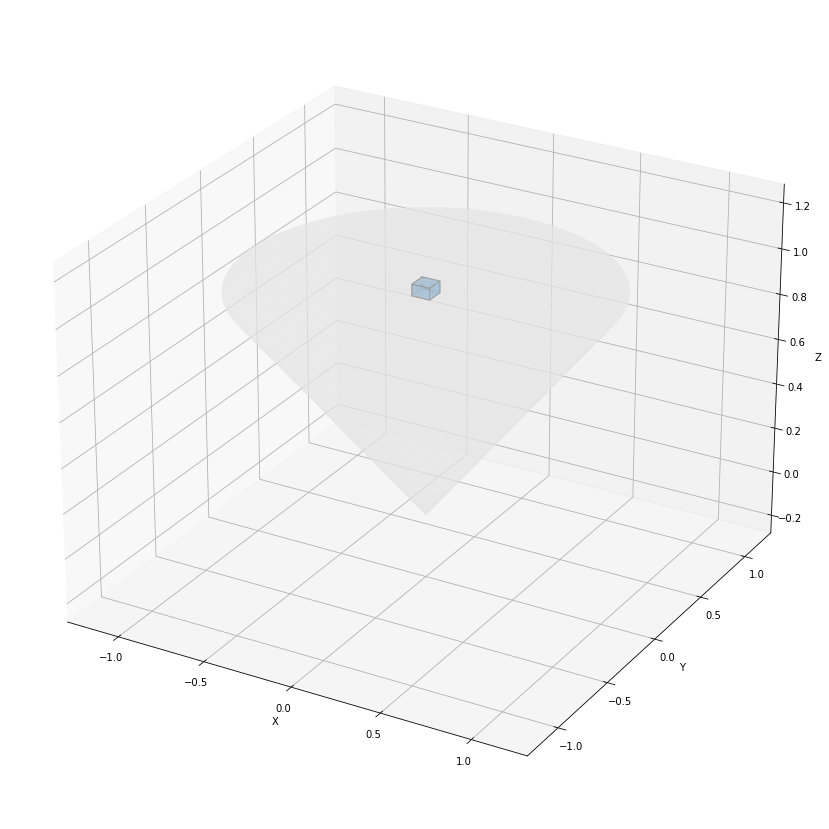

In [22]:
viz.plot(currZ=1, hsv=False)
viz.plot_tangent_space((0,0,1))
plt.show(block=False)

### Visualizing Exp with Affine-Invariant Metric

Tangent Matrix
[[ 0.25  0.5 ]
 [ 0.5  -0.75]]
Result
[[1.40442131 0.4226714 ]
 [0.4226714  0.55907851]]


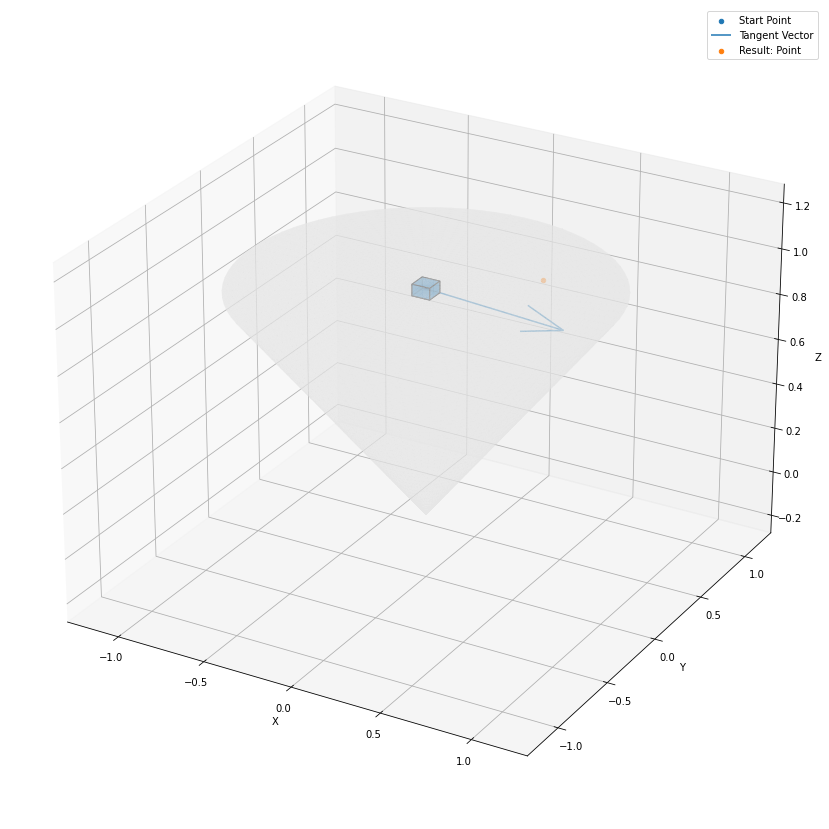

In [23]:
viz.plot()
viz.plot_tangent_space(point=(0,0,1))
viz.plot_exp()
plt.show()

### Visualizing Log with Affine-Invariant Metric

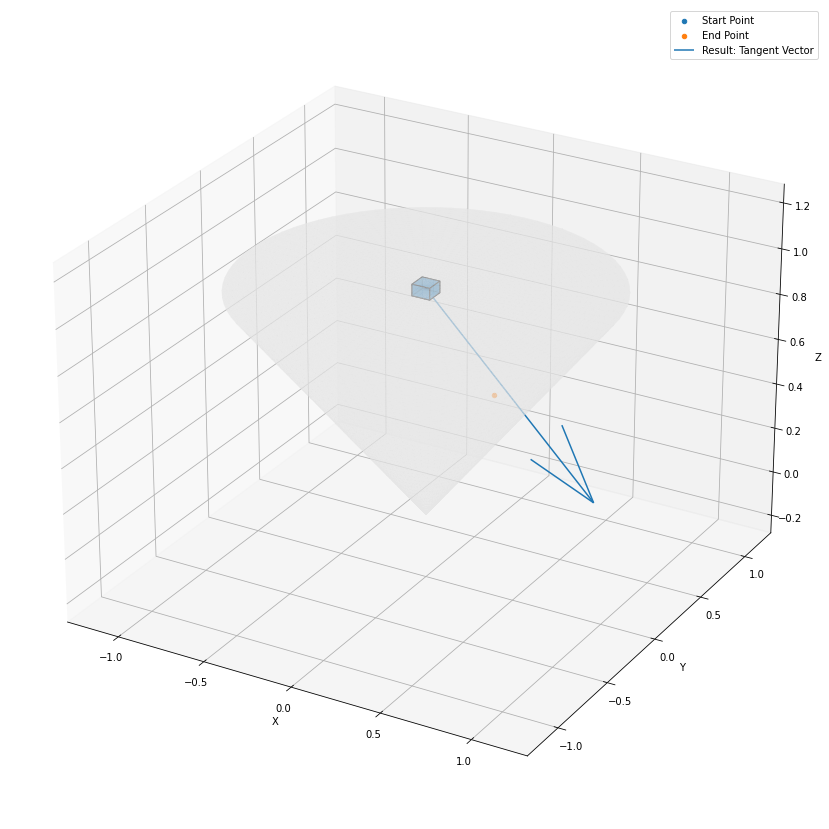

In [24]:
viz.plot()
viz.plot_tangent_space(point=(0,0,1))
viz.plot_log()
plt.show()

### Visualizing Geodesic with Affine-Invariant Metric

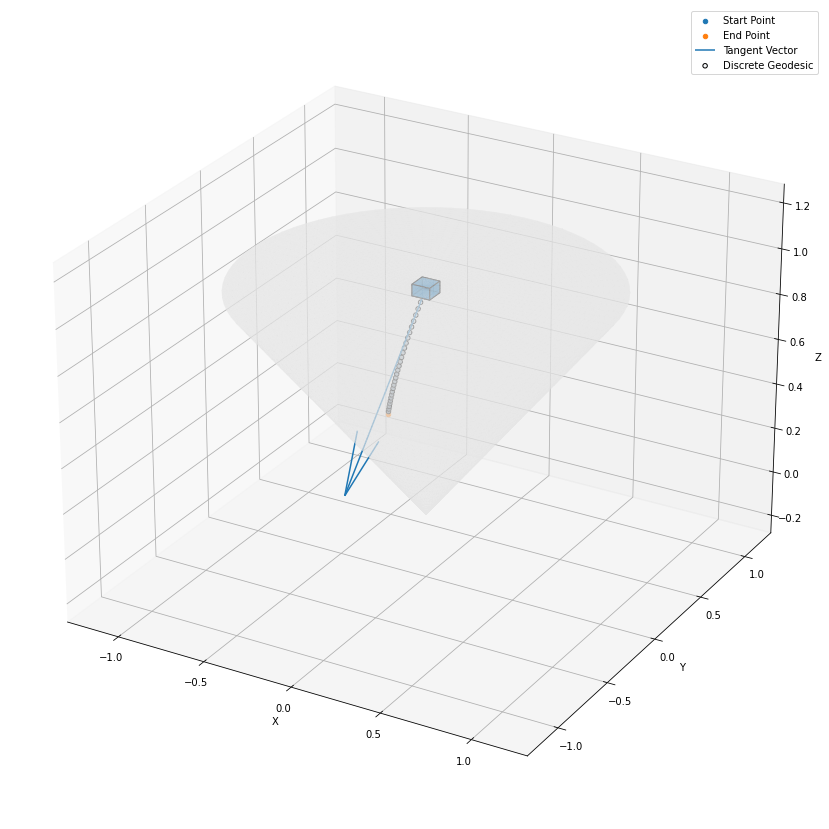

In [25]:
viz.plot()
viz.plot_tangent_space(point=(0,0,1))
viz.plot_geodesic(endPointXYZ=(-0.1,-0.2,0.5))
plt.show()

### Geodesic Grid

Here the maximum plotted z coordinate of the manifold is reduced so that the grid can be easier to see.

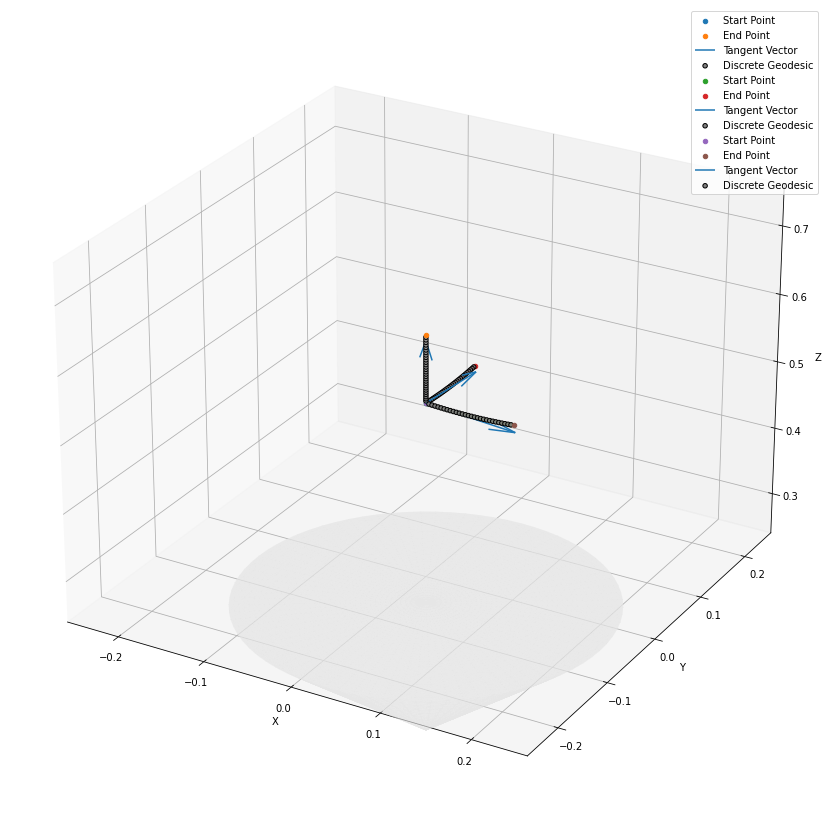

In [26]:
viz.plot(currZ=0.2)
viz.plot_grid()
viz.ax.set_xlim(-0.25, 0.25)
viz.ax.set_ylim(-0.25, 0.25)
viz.ax.set_zlim(0.25, 0.75)
plt.show()

## References

1. [Using Geometry of the Set of Symmetric Positive Semidefinite Matrices to
Classify Structural Brain Networks](https://link.springer.com/chapter/10.1007/978-3-319-96247-4_18)

1. [Functional Brain Network Classification With Compact Representation of SICE Matrices](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7031385)

1. [Re-visiting Riemannian geometry of symmetric positive definite matrices for the analysis of functional connectivity](https://reader.elsevier.com/reader/sd/pii/S1053811920309496?token=8280050FC18243FF84DA3C1674570B93D5661E20AA6EDFFDDB5AF6FB302001795CFFC57CD7CA89E8BF34EF28717F4411&originRegion=us-east-1&originCreation=20220421044225)

1. [Action Recognition from Video Using
Feature Covariance Matrices](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6479703)

1. [Spatio-Temporal Covariance Descriptors for Action and Gesture Recognition](https://arxiv.org/pdf/1303.6021.pdf)

1. [Log-Euclidean Metric Learning on Symmetric Positive Definite Manifold with Application to Image Set Classification](http://proceedings.mlr.press/v37/huanga15.pdf)

1. [Non-Euclidean statistics for covariance matrices, with applications to diffusion tensor imaging](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-3/issue-3/Non-Euclidean-statistics-for-covariance-matrices-with-applications-to-diffusion/10.1214/09-AOAS249.full)

1. [Riemannian geometry for the statistical analysis of diffusion tensor data](https://www.sciencedirect.com/science/article/pii/S0165168406001691?via%3Dihub)

1. [Geomstats: A Python Package for Riemannian Geometry in Machine Learning](https://www.jmlr.org/papers/volume21/19-027/19-027.pdf) 